

텍스트정보처리 중간과제
20175308 김정웅



In [1]:
!apt-get install -y xvfb 
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')  
os.environ['DISPLAY']=':1.0'

%matplotlib inline
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 코드수행1

In [3]:
text = "Family is not an important thing. It's everything."

In [4]:
# (1) 
word_tokens = word_tokenize(text)

In [5]:
# (2)
stop_words = nltk.corpus.stopwords.words('english')

In [6]:
# (3)
cleaned_words = [w for w in word_tokens if w.lower() not in stop_words]

In [7]:
print(word_tokens)
print(cleaned_words)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', "'s", 'everything', '.']


## 코드수행2

In [8]:
words = ['policy','doing','organization','have','going','love','lives','fly','dies','watched','has','starting']
from nltk import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# (1)
stemmer = PorterStemmer()
stems = [stemmer.stem(t) for t in words]

In [10]:
# (2)
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in words]

In [11]:
print(stems)
print(lemmas)

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


## 코드수행3

In [33]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

quote = """
 If you wish to make an apple pie from scratch,
 you must first invent the universe."""

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
# (1)
words_quote = word_tokenize(quote)

In [35]:
# (2)
tags = nltk.pos_tag(words_quote)

In [36]:
print(words_quote)
print(tags)

['If', 'you', 'wish', 'to', 'make', 'an', 'apple', 'pie', 'from', 'scratch', ',', 'you', 'must', 'first', 'invent', 'the', 'universe', '.']
[('If', 'IN'), ('you', 'PRP'), ('wish', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('you', 'PRP'), ('must', 'MD'), ('first', 'VB'), ('invent', 'VB'), ('the', 'DT'), ('universe', 'NN'), ('.', '.')]


## 코드수행4

In [16]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

quote = 'the little yellow dog barked at the cat.'

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [17]:
# (1)
words_quote = word_tokenize(quote)

In [18]:
# (2)
pos_tags = nltk.pos_tag(words_quote)
print(pos_tags)

[('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN'), ('.', '.')]


In [19]:
# (3)
grammer = '\n'.join([
    'NP:{<DT>?<JJ>*<NN>}',
    'NP:{<NN>&}'
])

In [20]:
# (4)
chunker_parser = nltk.RegexpParser(grammer)

In [21]:
# (5)
tags = nltk.pos_tag(words_quote)

tree = chunker_parser.parse(tags)
print(tree)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  ./.)


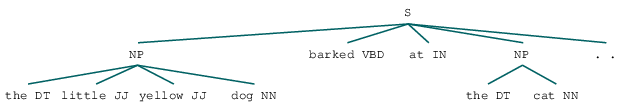

In [22]:
# (6)
display(tree)

## 코드수행5

In [23]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
sentence = 'Deemed universities charge huge fees'

In [25]:
# (1)
tokens = word_tokenize(sentence)

In [26]:
# (2)
grammar = nltk.grammar.DependencyGrammar.fromstring("""
'universities' -> 'Deemed'
'charge' -> 'universities'
'fees' -> 'huge'
'charge' -> 'fees'
""")

In [27]:
# (3)
dp = nltk.parse.ProjectiveDependencyParser(grammar)

In [28]:
# (4)
ps = [t for t in sorted(dp.parse(sentence.split()))]

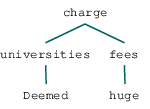

In [29]:
# (5)
for t in sorted(dp.parse(sentence.split())):
    display(t)

In [30]:
# (6)
import spacy
from spacy import displacy

In [31]:
tag = spacy.load('en_core_web_sm')

In [32]:
dpgrammar = tag(sentence)
displacy.render(dpgrammar, style='dep', jupyter=True, options={'distance': 120})